# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_renda = pd.read_csv('previsao_de_renda.csv')
df_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [15]:
# Como irei plotar diversos gráficos para as variáveis qualitativas, primeiro irei agrupa-las pela data e realizo a contagem 

agrupamento = df_renda.groupby(['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']).size().reset_index(name='Count')

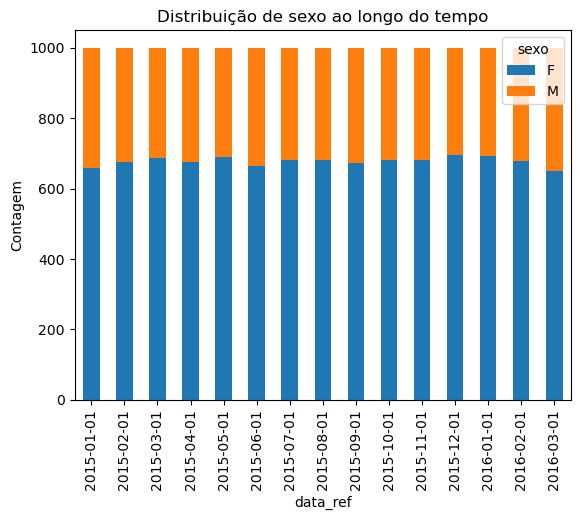

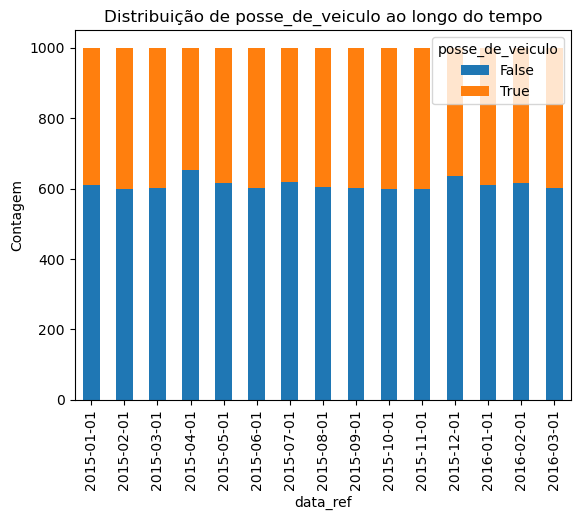

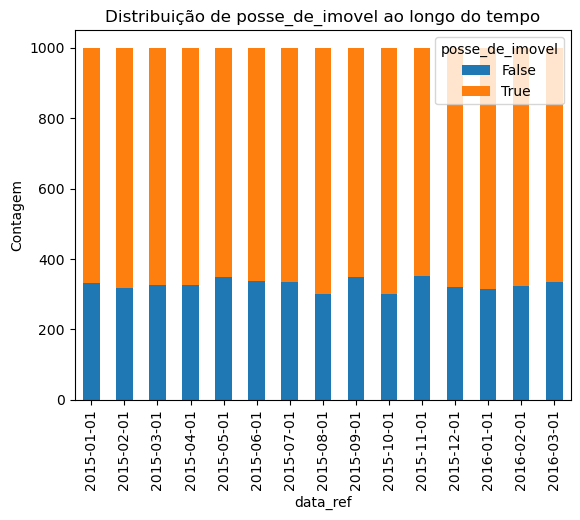

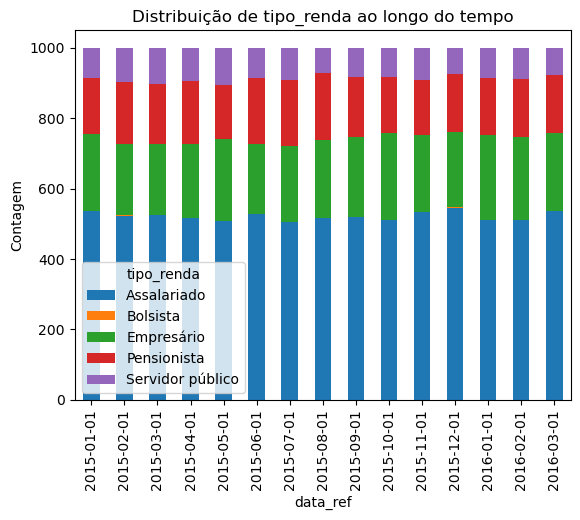

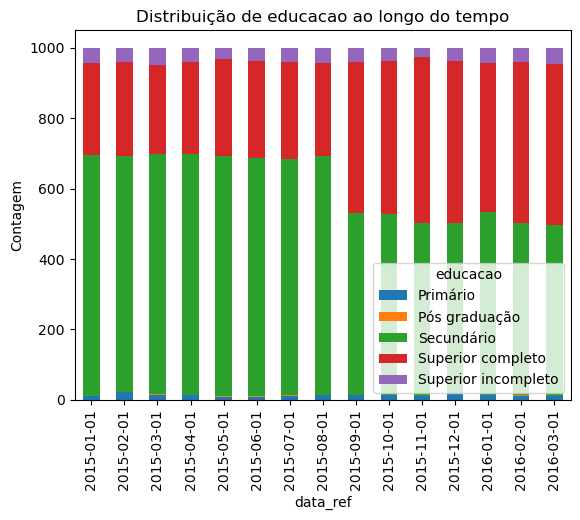

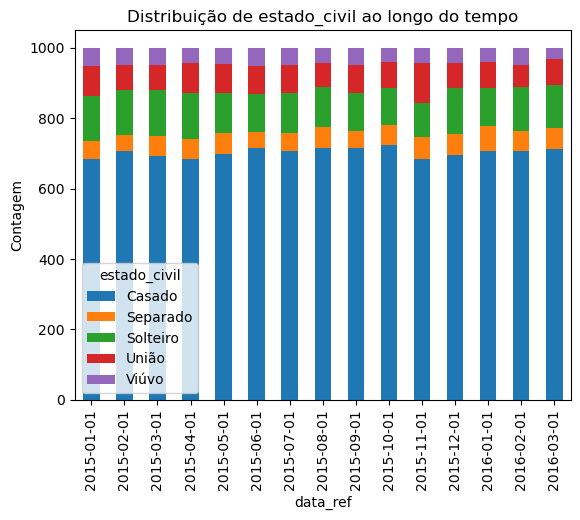

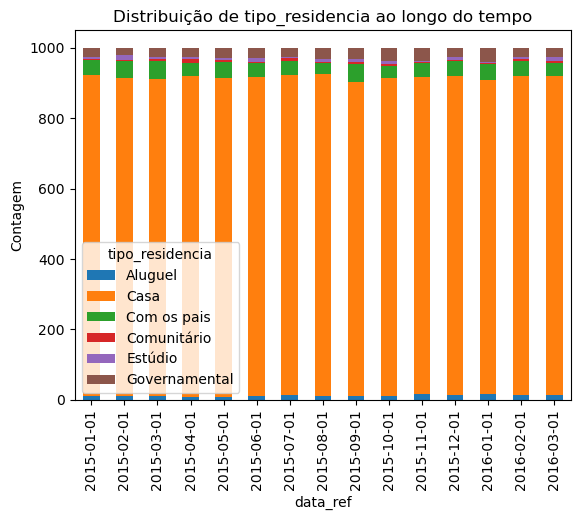

In [16]:
# Agora ploto cada um dos gráficos para sua respectiva variavel qualitativa com a soma delas no tempo

variaveis = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

for variavel in variaveis:
    fig, ax = plt.subplots()
    agrupamento_variavel = agrupamento.groupby(['data_ref', variavel])['Count'].sum().unstack().plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('data_ref')
    ax.set_ylabel('Contagem')
    ax.set_title(f'Distribuição de {variavel} ao longo do tempo')
    plt.show()

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [25]:
# Primeiro, vou certificar que as datas estão no tipo datetime

df_renda['data_ref'] = pd.to_datetime(df_renda['data_ref'])

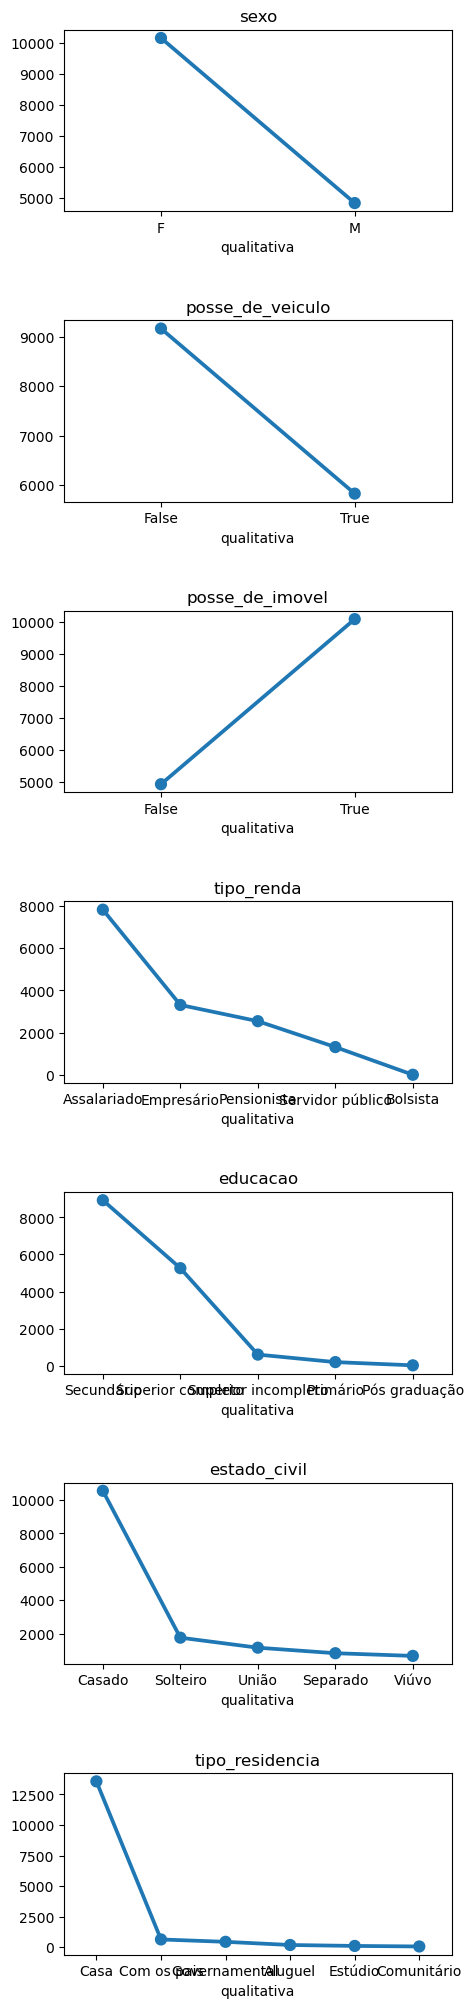

In [45]:
# Especificar as variaveis que irei fazer os gráficos
qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Definindo as caracteristicas estéticas para os gráficos
fig, axes = plt.subplots(nrows=len(qualitativas), figsize=(5, 25))

# Iterações para todos os gráficos
for i, col in enumerate(qualitativas):
    # Como o pointplot só pode receber variáveis numericas, antes de plotar irei calcular a contagem para cada variável qualitativa
    countagem = df_renda[col].value_counts().reset_index()
    countagem.columns = ['qualitativa', 'contagem']
    
    # Plotar o pointplot para as contagens
    sns.pointplot(x = 'qualitativa', y = 'contagem', data = countagem, ax = axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')

# Ajustar os espaçamentos entre os gráficos
plt.subplots_adjust(hspace=0.6)

# Exibir o conjunto de gráficos
plt.show()

A partir do que temos, as variáveis se apresentam estáveis sim. Não houveram muitas mudanças nos gráficos em relação ao anterior, pois para utilizar o pointplot foi necessário realizar a contagem da quantidade de cada uma das variáveis qualitativas. É possível utiliza-las em uma modelagem, porém é necessário associa-las com outras variáveis, pois não foi muito conclusivo a análise associada ao tempo.